<a href="https://colab.research.google.com/github/gnc506/Skills_Assessment/blob/main/Skills_Assessment_2_asha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

# Load the provided datasets
file_path_articles = '/content/articles.Dengue.csv'
file_path_authors = '/content/authors.Dengue.csv'
file_path_paper_counts = '/content/paper_counts.csv'

# Reading the datasets
df_articles = pd.read_csv(file_path_articles)
df_authors = pd.read_csv(file_path_authors)
df_paper_counts = pd.read_csv(file_path_paper_counts)

# Displaying the first few rows of each dataset to understand their structure
df_articles.head(), df_authors.head(), df_paper_counts.head()


(       PMID                                              Title  \
 0  10548291  Hospitalizations for suspected dengue in Puert...   
 1  10548309  Dynamics of susceptibility and transmissibilit...   
 2  10555454       Childhood dengue shock syndrome in Trinidad.   
 3  10559263  A novel in vitro replication system for Dengue...   
 4  10588771  Dengue: an evaluation of dengue severity in Fr...   
 
                                             Abstract       ISSN  \
 0  Capture-recapture estimations compare the resu...  0002-9637   
 1  Dengue-1 virus PDK13 and isolates from vaccine...  0002-9637   
 2  Dengue haemorrhagic fever/dengue shock syndrom...  0043-3144   
 3  Positive strand viral replicases are membrane-...  0021-9258   
 4  We conducted a retrospective study of 403 labo...  1360-2276   
 
                                              Journal        Location  Year  \
 0  The American journal of tropical medicine and ...      (61) 574-8  1999   
 1  The American journal of 

In [3]:
df_articles_clean = df_articles.drop_duplicates()
df_authors_clean = df_authors.drop_duplicates()

# Converting 'Year' to integer
df_articles_clean['Year'] = pd.to_numeric(df_articles_clean['Year'], errors='coerce').fillna(0).astype(int)

# Dropping rows with missing FirstAuthor details in articles dataset and missing author details in authors dataset
df_articles_clean = df_articles_clean.dropna(subset=['FirstAuthorForename', 'FirstAuthorLastname', 'FirstAuthorInitials'])
df_authors_clean = df_authors_clean.dropna(subset=['AuthorForename', 'AuthorInitials'])

# Standardizing author names
df_articles_clean['StandardizedName'] = df_articles_clean['FirstAuthorLastname'] + " " + df_articles_clean['FirstAuthorInitials']
df_authors_clean['StandardizedName'] = df_authors_clean['AuthorLastname'] + " " + df_authors_clean['AuthorInitials']

# Displaying the cleaned data for a quick check
df_articles_clean.head(), df_authors_clean.head()

(       PMID                                              Title  \
 0  10548291  Hospitalizations for suspected dengue in Puert...   
 1  10548309  Dynamics of susceptibility and transmissibilit...   
 2  10555454       Childhood dengue shock syndrome in Trinidad.   
 3  10559263  A novel in vitro replication system for Dengue...   
 4  10588771  Dengue: an evaluation of dengue severity in Fr...   
 
                                             Abstract       ISSN  \
 0  Capture-recapture estimations compare the resu...  0002-9637   
 1  Dengue-1 virus PDK13 and isolates from vaccine...  0002-9637   
 2  Dengue haemorrhagic fever/dengue shock syndrom...  0043-3144   
 3  Positive strand viral replicases are membrane-...  0021-9258   
 4  We conducted a retrospective study of 403 labo...  1360-2276   
 
                                              Journal        Location  Year  \
 0  The American journal of tropical medicine and ...      (61) 574-8  1999   
 1  The American journal of 

In [4]:
df_articles_clean

,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation,StandardizedName
0,10548291,Hospitalizations for suspected dengue in Puert...,Capture-recapture estimations compare the resu...,0002-9637,The American journal of tropical medicine and ...,(61) 574-8,1999,E J,Dechant,EJ,"Harvard Medical School, Boston, Massachusetts,...",Dechant EJ
1,10548309,Dynamics of susceptibility and transmissibilit...,Dengue-1 virus PDK13 and isolates from vaccine...,0002-9637,The American journal of tropical medicine and ...,(61) 672-6,1999,N,Jirakanjanakit,N,"Center for Vaccine Development, Institute of S...",Jirakanjanakit N
2,10555454,Childhood dengue shock syndrome in Trinidad.,Dengue haemorrhagic fever/dengue shock syndrom...,0043-3144,The West Indian medical journal,(48) 115-7,1999,S,Teelucksingh,S,NaN,Teelucksingh S
3,10559263,A novel in vitro replication system for Dengue...,Positive strand viral replicases are membrane-...,0021-9258,The Journal of biological chemistry,(274) 33714-22,1999,S,You,S,"Department of Biochemistry, University of Kans...",You S
4,10588771,Dengue: an evaluation of dengue severity in Fr...,We conducted a retrospective study of 403 labo...,1360-2276,Tropical medicine & international health : TM ...,(4) 765-73,1999,B,Murgue,B,"Unité de Virologie, Institut Territorial de Re...",Murgue B
...,...,...,...,...,...,...,...,...,...,...,...,...
9661,38081831,"Interactions between climate change, urban inf...","Dengue is expanding globally, but how dengue e...",2041-1723,Nature communications,(14) 8179,2023,Rory,Gibb,R,Department of Infectious Disease Epidemiology ...,Gibb R
9662,38086397,Emergence of Dengue Virus Serotype 2 Cosmopoli...,Using Oxford Nanopore technologies and phyloge...,1080-6059,Emerging infectious diseases,10.3201/eid3001.230972,2023,David,Martínez,D,NaN,Martínez D
9663,38090413,A Narrative Review of Maternal and Perinatal O...,Dengue is one of the most prevalent mosquito-b...,2168-8184,Cureus,(15) e48640,2023,Shivani,Ahuja,S,"Community Medicine, Jawaharlal Nehru Medical C...",Ahuja S
9664,38095160,Liver enzyme alteration in response to dengue ...,Infectious diseases are extremely important in...,1130-0108,Revista espanola de enfermedades digestivas,10.17235/reed.2023.10102/2023,2023,Marta,Álvarez-García,M,"Aparato Digestivo, Hospital Universitario Fund...",Álvarez-García M


In [5]:
df_authors_clean

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,StandardizedName
0,10548291,1,E J,Dechant,EJ,"Harvard Medical School, Boston, Massachusetts,...",Dechant EJ
1,10548291,2,J G,Rigau-Pérez,JG,NaN,Rigau-Pérez JG
2,10548309,1,N,Jirakanjanakit,N,"Center for Vaccine Development, Institute of S...",Jirakanjanakit N
3,10548309,2,M M,Khin,MM,NaN,Khin MM
4,10548309,3,S,Yoksan,S,NaN,Yoksan S
...,...,...,...,...,...,...,...
67330,38095160,2,Lola,Otegui,L,"Aparato Digestivo, Hospital Universitario Fund...",Otegui L
67331,38095160,3,Adriana,Ortega Larrodé,A,"Aparato Digestivo, Hospital Universitario Fund...",Ortega Larrodé A
67332,38095160,4,Rocío,Calvo Hernández,R,"Aparato Digestivo, Hospital Universitario Fund...",Calvo Hernández R
67333,38096143,1,Mahadee,Al Mobin,M,"Department of Mathematics, University of Dhaka...",Al Mobin M


In [6]:
# Identifying the top 30 most active researchers
# This time we'll include both first and last names for a clearer identification
top_30_researchers = df_authors_clean['AuthorLastname'] + " " + df_authors_clean['AuthorForename']
top_30_researchers = top_30_researchers.value_counts().head(30)

top_30_researchers


Harris Eva               128
Simmons Cameron P         66
Ooi Eng Eong              66
Rothman Alan L            64
Vasudevan Subhash G       59
Shi Pei-Yong              54
Wilder-Smith Annelies     53
Thomas Stephen J          53
Takasaki Tomohiko         51
de Silva Aravinda M       50
Balmaseda Angel           49
Malasit Prida             47
Morita Kouichi            47
Jarman Richard G          46
Wills Bridget             45
Lin Yee-Shin              44
Endy Timothy P            43
Nisalak Ananda            43
Diamond Michael S         43
Gubler Duane J            43
Bartenschlager Ralf       42
Sharp Tyler M             42
Yoon In-Kyu               42
Barrera Roberto           41
Kalayanarooj Siripen      41
Yeh Trai-Ming             41
Halstead Scott B          41
Sasmono R Tedjo           40
Leo Yee Sin               37
Tomashek Kay M            37
dtype: int64

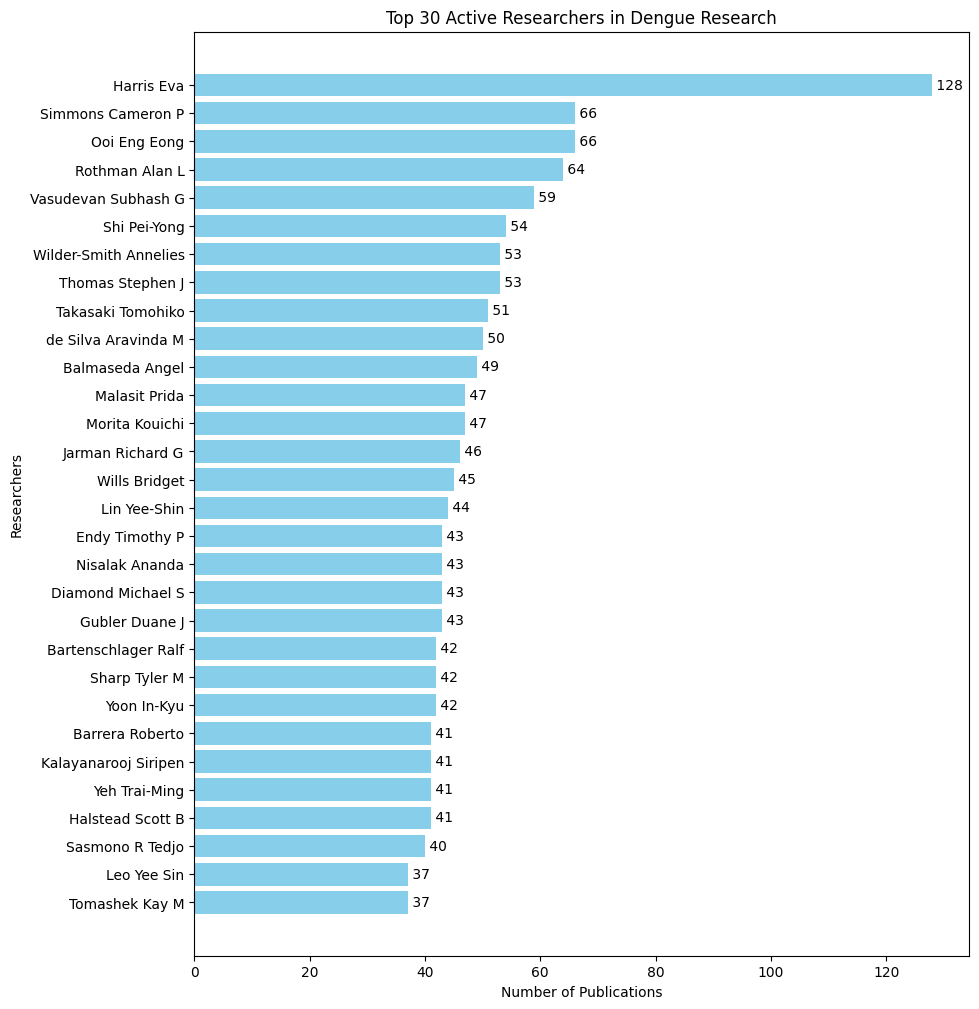

In [9]:
# It seems there was an issue with the variable 'researchers'. I'll define it again and replot the chart.

# Extracting researcher names and publication counts again
researchers = top_30_researchers.index.tolist()
publications = top_30_researchers.values.tolist()

# Replotting with the number of publications displayed on each bar
plt.figure(figsize=(10, 12))
bars = plt.barh(researchers, publications, color='skyblue')

# Adding the publication counts on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f' {width}', va='center')

plt.xlabel('Number of Publications')
plt.ylabel('Researchers')
plt.title('Top 30 Active Researchers in Dengue Research')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


In [14]:
# Creating a new column for full name in the df_authors_clean dataset
df_authors_clean['FullName'] = df_authors_clean['AuthorLastname'] + " " + df_authors_clean['AuthorForename']

# Displaying the first few rows to verify the new column
df_authors_clean.head()


,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,StandardizedName,FullName
0,10548291,1,E J,Dechant,EJ,"Harvard Medical School, Boston, Massachusetts,...",Dechant EJ,Dechant E J
1,10548291,2,J G,Rigau-Pérez,JG,NaN,Rigau-Pérez JG,Rigau-Pérez J G
2,10548309,1,N,Jirakanjanakit,N,"Center for Vaccine Development, Institute of S...",Jirakanjanakit N,Jirakanjanakit N
3,10548309,2,M M,Khin,MM,NaN,Khin MM,Khin M M
4,10548309,3,S,Yoksan,S,NaN,Yoksan S,Yoksan S


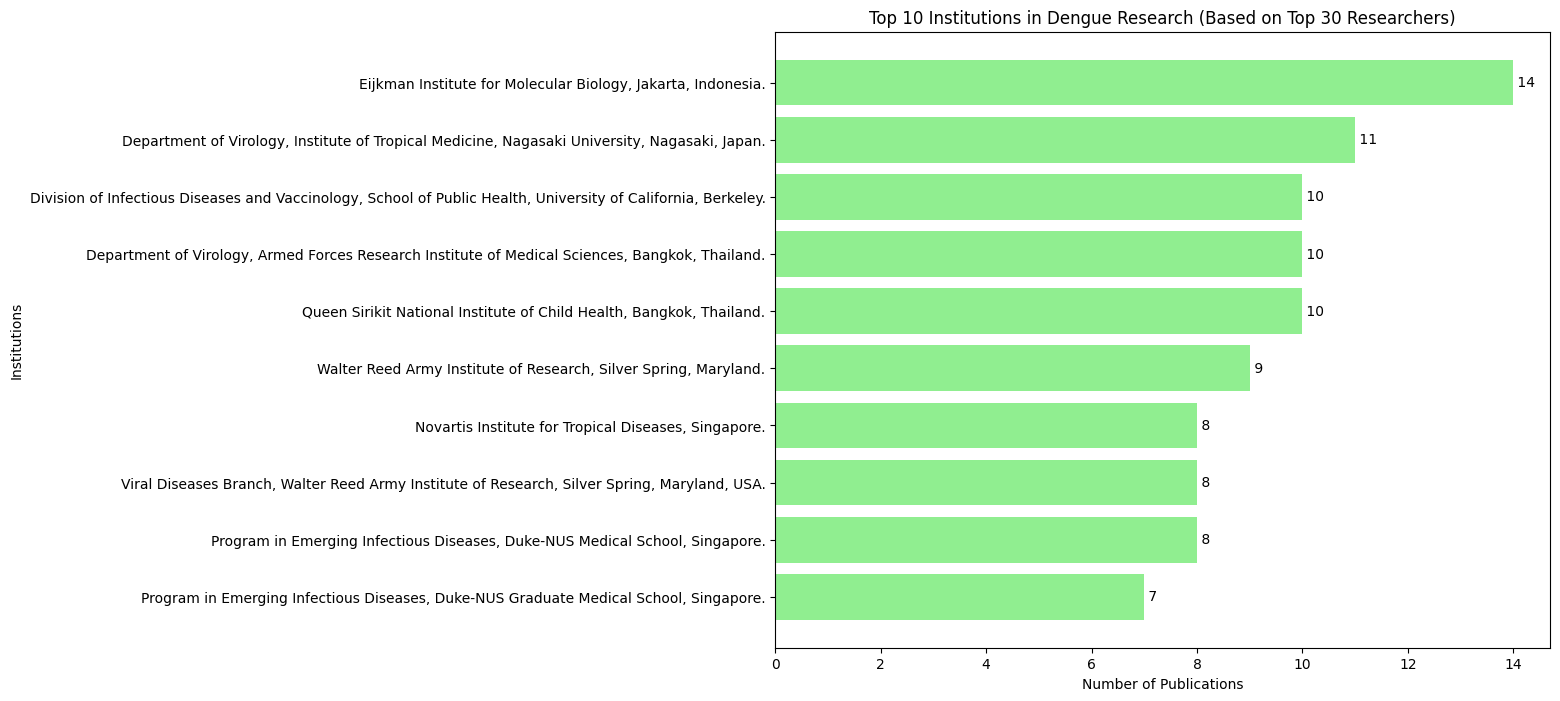

In [16]:
# It appears there was a mistake in the variable name. I will recreate the top_30_researchers_fullname list and replot the chart.

# Recreating the list of full names for the top 30 researchers
top_30_researchers_fullname = top_30_researchers.index.tolist()

# Filtering the authors dataset for the top 30 researchers based on their full names
filtered_authors_affiliations = df_authors_clean[df_authors_clean['FullName'].isin(top_30_researchers_fullname)]

# Counting the number of publications per institution
institution_counts = filtered_authors_affiliations['AuthorAffiliation'].value_counts().head(10)

# Plotting the institutions
institutions = institution_counts.index.tolist()
publication_counts = institution_counts.values.tolist()

plt.figure(figsize=(10, 8))
bars = plt.barh(institutions, publication_counts, color='lightgreen')

# Adding the publication counts on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f' {width}', va='center')

plt.xlabel('Number of Publications')
plt.ylabel('Institutions')
plt.title('Top 10 Institutions in Dengue Research (Based on Top 30 Researchers)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


<ipython-input-17-8d4d0bf4dc1b>:13: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


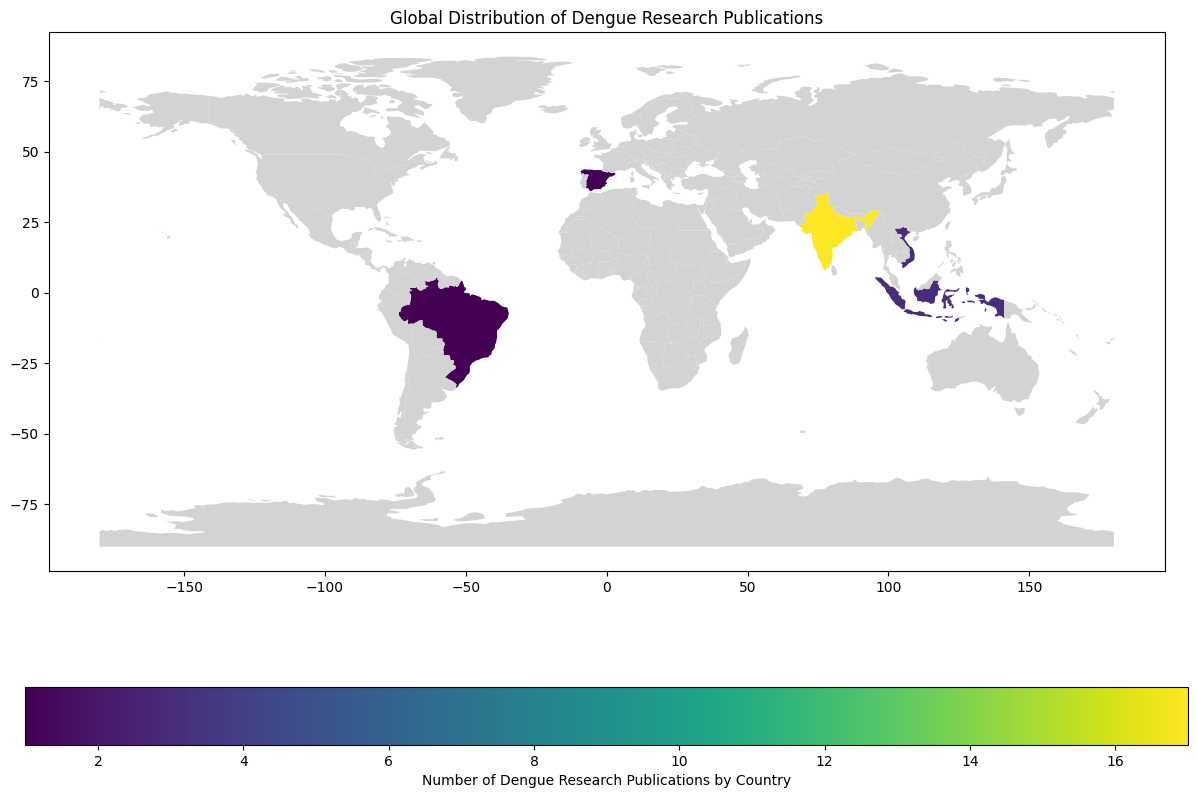

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming we have country data in the 'AuthorAffiliation' column
# Extracting country names from the affiliations
# This is a simplistic extraction and might not be 100% accurate
df_authors_clean['Country'] = df_authors_clean['AuthorAffiliation'].str.extract(r'\b(\w+)$')

# Aggregating data by country
country_counts = df_authors_clean['Country'].value_counts()

# Loading a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merging the dengue research data with the world map
world_dengue = world.set_index('name').join(country_counts.rename('ResearchCount')).reset_index()

# Plotting the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world_dengue.plot(column='ResearchCount', ax=ax, legend=True,
                  legend_kwds={'label': "Number of Dengue Research Publications by Country",
                               'orientation': "horizontal"},
                  missing_kwds={'color': 'lightgrey'})
plt.title('Global Distribution of Dengue Research Publications')
plt.show()


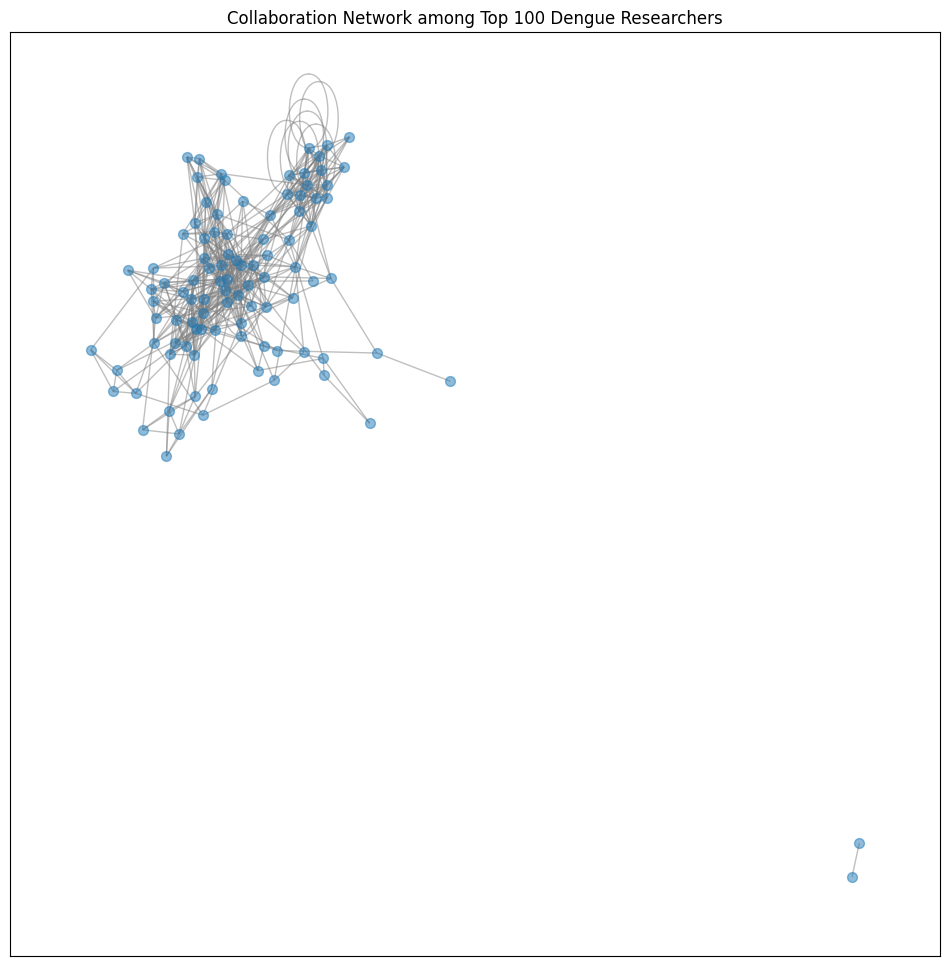

In [20]:
import networkx as nx

# Creating a collaboration network for the top 100 most active researchers
top_100_researchers = df_authors_clean['StandardizedName'].value_counts().head(100).index.tolist()
filtered_authors_top_100 = df_authors_clean[df_authors_clean['StandardizedName'].isin(top_100_researchers)]

# Initializing a graph
collaboration_network = nx.Graph()

# Adding edges for each set of authors that co-authored a paper
for _, paper in filtered_authors_top_100.groupby('PMID'):
    authors = paper['StandardizedName'].tolist()
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):
            collaboration_network.add_edge(authors[i], authors[j])

# Drawing the collaboration network
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(collaboration_network, k=0.1)
nx.draw_networkx(collaboration_network, pos, node_size=50, edge_color="gray", alpha=0.5, with_labels=False)
plt.title("Collaboration Network among Top 100 Dengue Researchers")
plt.show()


In [25]:
# Calculating the number of collaborations for each researcher in the top 100
collaboration_counts = pd.Series(dict(nx.degree(collaboration_network)))
collaboration_counts = collaboration_counts.sort_values(ascending=False)

collaboration_counts.head(10)  # Displaying the top 10 for brevity



Harris E      32
Simmons CP    29
Yoksan S      23
Gubler DJ     23
Malasit P     22
Holmes EC     22
Ooi EE        21
Zhang Y       19
Li Y          19
Gibbons RV    19
dtype: int64

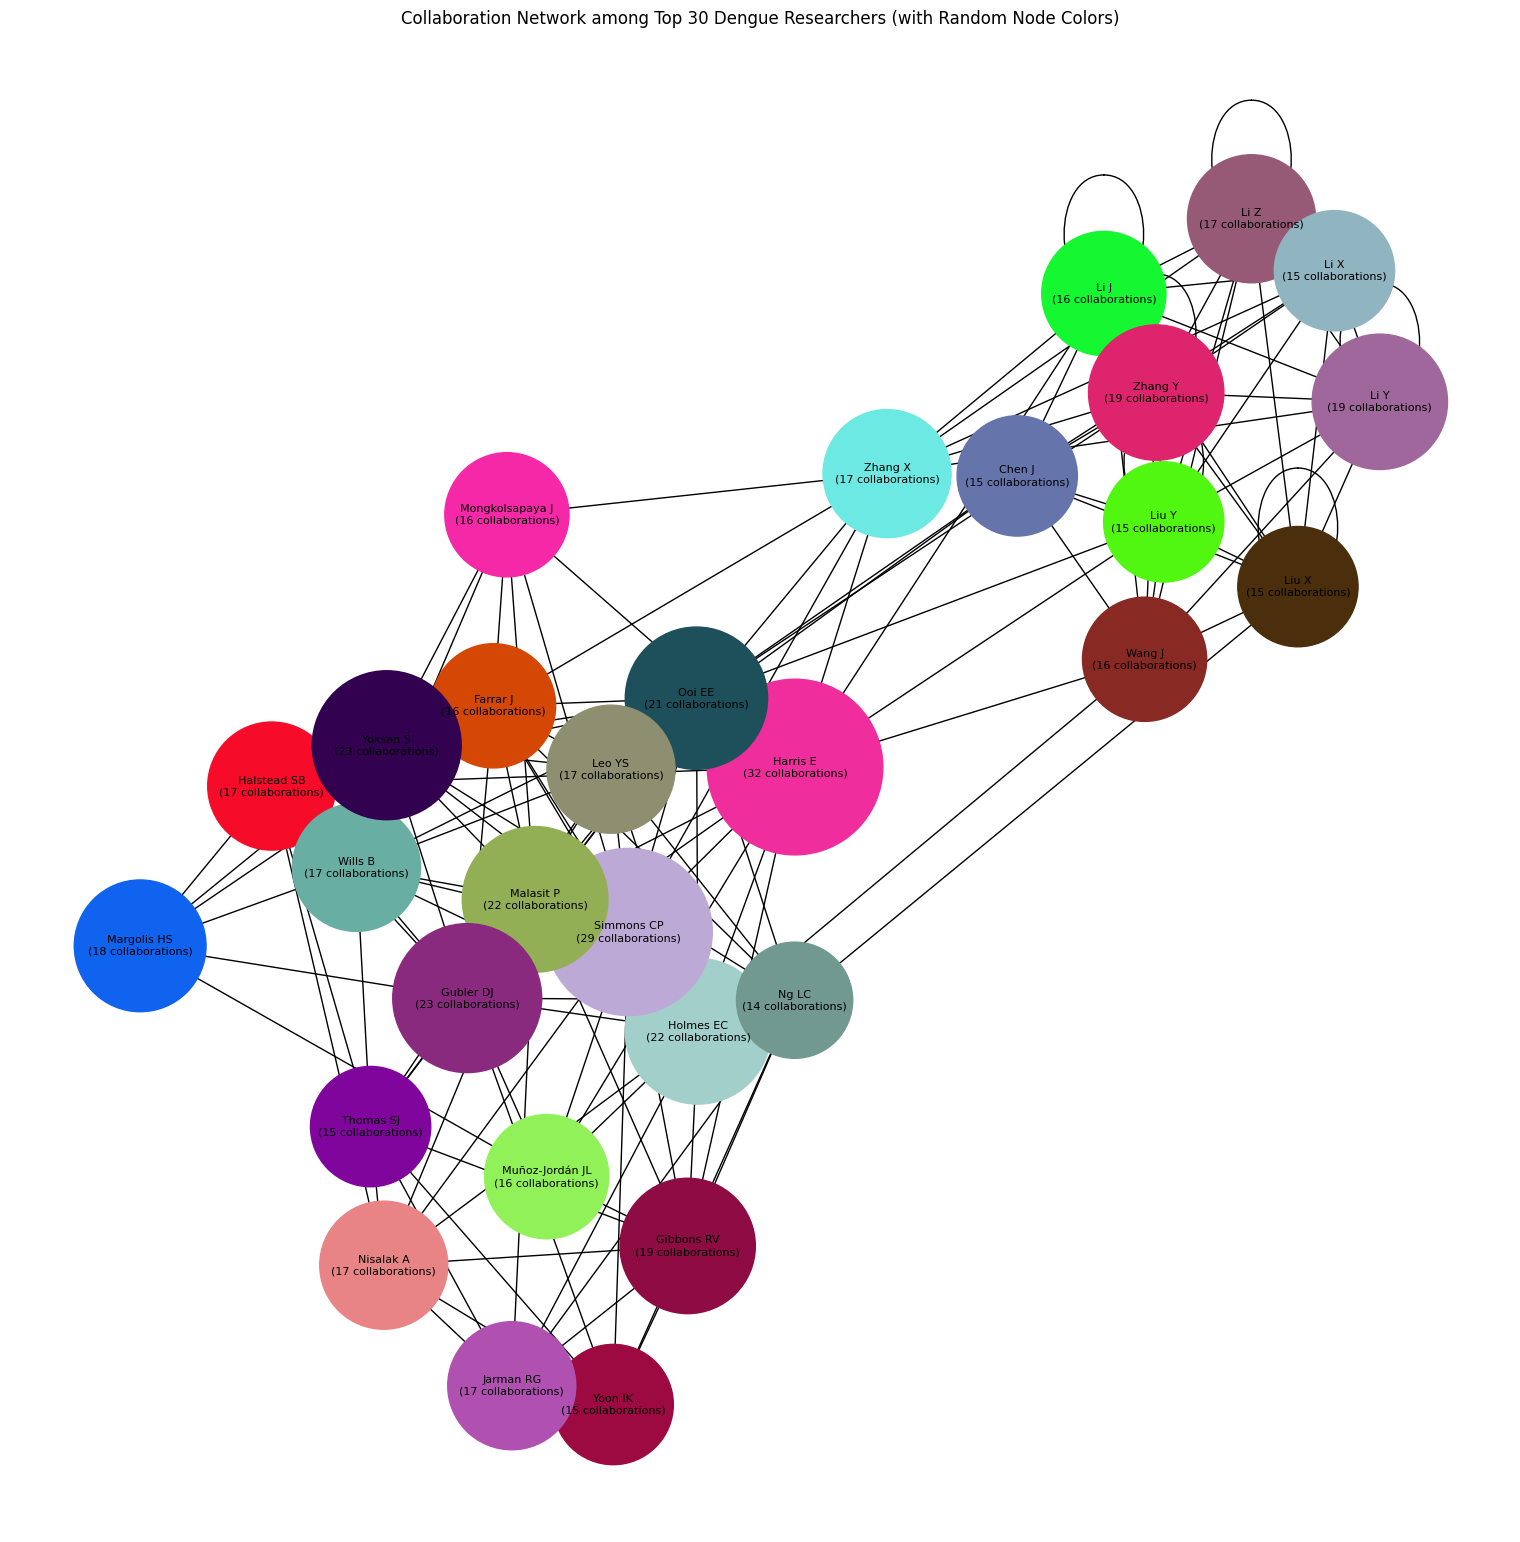

In [39]:
# Calculating the number of collaborations for each researcher in the top 30
top_30_collaboration_counts = collaboration_counts.head(30)
top_30_researchers_subset = top_30_collaboration_counts.index.tolist()
# Create a subgraph with the top 30 researchers for clarity
collaboration_network_subset = collaboration_network.subgraph(top_30_researchers_subset)

# Calculate positions for nodes in the graph
pos = nx.spring_layout(collaboration_network_subset, seed=42)


import random

# Generate random colors for nodes
node_colors = [f'#{random.randint(0, 0xFFFFFF):06x}' for _ in range(len(collaboration_network_subset.nodes))]

# Draw the network graph with random node colors and counts on nodes
plt.figure(figsize=(15, 15))
nx.draw(collaboration_network_subset, pos, node_size=node_sizes, labels=labels, with_labels=True, font_size=8, font_color='black', node_color=node_colors)
plt.title("Collaboration Network among Top 30 Dengue Researchers (with Random Node Colors)")
plt.show()



In [32]:
# Function to extract country from author affiliation
def extract_country(affiliation):
    if isinstance(affiliation, str):
        # Split the affiliation by ',' and take the last part as the potential country name
        parts = affiliation.split(',')
        potential_country = parts[-1].strip()

        # Check if the potential country name contains only alphabetic characters (basic check)
        if potential_country.isalpha():
            return potential_country
    return None  # Return None for missing or non-conforming values

# Create a 'Country' column by applying the extract_country function to the 'AuthorAffiliation' column
df_authors_clean['Country'] = df_authors_clean['AuthorAffiliation'].apply(extract_country)

# Displaying the first few rows of the dataset with the 'Country' column
df_authors_clean[['AuthorAffiliation', 'Country']].head()


,AuthorAffiliation,Country
0,"Harvard Medical School, Boston, Massachusetts,...",None
1,NaN,None
2,"Center for Vaccine Development, Institute of S...",None
3,NaN,None
4,NaN,None


In [33]:
df_authors_clean

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,StandardizedName,FullName,Country
0,10548291,1,E J,Dechant,EJ,"Harvard Medical School, Boston, Massachusetts,...",Dechant EJ,Dechant E J,None
1,10548291,2,J G,Rigau-Pérez,JG,NaN,Rigau-Pérez JG,Rigau-Pérez J G,None
2,10548309,1,N,Jirakanjanakit,N,"Center for Vaccine Development, Institute of S...",Jirakanjanakit N,Jirakanjanakit N,None
3,10548309,2,M M,Khin,MM,NaN,Khin MM,Khin M M,None
4,10548309,3,S,Yoksan,S,NaN,Yoksan S,Yoksan S,None
...,...,...,...,...,...,...,...,...,...
67330,38095160,2,Lola,Otegui,L,"Aparato Digestivo, Hospital Universitario Fund...",Otegui L,Otegui Lola,None
67331,38095160,3,Adriana,Ortega Larrodé,A,"Aparato Digestivo, Hospital Universitario Fund...",Ortega Larrodé A,Ortega Larrodé Adriana,None
67332,38095160,4,Rocío,Calvo Hernández,R,"Aparato Digestivo, Hospital Universitario Fund...",Calvo Hernández R,Calvo Hernández Rocío,None
67333,38096143,1,Mahadee,Al Mobin,M,"Department of Mathematics, University of Dhaka...",Al Mobin M,Al Mobin Mahadee,None


In [35]:
# Function to extract country from author affiliation
def extract_country(affiliation):
    if isinstance(affiliation, str):
        # Split the affiliation by ',' and take the last part as the potential country name
        parts = affiliation.split(',')
        potential_country = parts[-1].strip()

        # Check if the potential country name contains only alphabetic characters (basic check)
        if potential_country.isalpha():
            return potential_country
    return None  # Return None for missing or non-conforming values

# Convert non-string values in 'AuthorAffiliation' to empty strings
df_authors_clean['AuthorAffiliation'] = df_authors_clean['AuthorAffiliation'].apply(lambda x: str(x) if isinstance(x, float) else x)

# Create a 'Country' column by applying the extract_country function to the 'AuthorAffiliation' column
df_authors_clean['Country'] = df_authors_clean['AuthorAffiliation'].apply(extract_country)

# Displaying the first few rows of the dataset with the 'Country' column
df_authors_clean[['AuthorAffiliation', 'Country']].head()


,AuthorAffiliation,Country
0,"Harvard Medical School, Boston, Massachusetts,...",None
1,nan,nan
2,"Center for Vaccine Development, Institute of S...",None
3,nan,nan
4,nan,nan


In [36]:
df_authors_clean

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,StandardizedName,FullName,Country
0,10548291,1,E J,Dechant,EJ,"Harvard Medical School, Boston, Massachusetts,...",Dechant EJ,Dechant E J,None
1,10548291,2,J G,Rigau-Pérez,JG,nan,Rigau-Pérez JG,Rigau-Pérez J G,nan
2,10548309,1,N,Jirakanjanakit,N,"Center for Vaccine Development, Institute of S...",Jirakanjanakit N,Jirakanjanakit N,None
3,10548309,2,M M,Khin,MM,nan,Khin MM,Khin M M,nan
4,10548309,3,S,Yoksan,S,nan,Yoksan S,Yoksan S,nan
...,...,...,...,...,...,...,...,...,...
67330,38095160,2,Lola,Otegui,L,"Aparato Digestivo, Hospital Universitario Fund...",Otegui L,Otegui Lola,None
67331,38095160,3,Adriana,Ortega Larrodé,A,"Aparato Digestivo, Hospital Universitario Fund...",Ortega Larrodé A,Ortega Larrodé Adriana,None
67332,38095160,4,Rocío,Calvo Hernández,R,"Aparato Digestivo, Hospital Universitario Fund...",Calvo Hernández R,Calvo Hernández Rocío,None
67333,38096143,1,Mahadee,Al Mobin,M,"Department of Mathematics, University of Dhaka...",Al Mobin M,Al Mobin Mahadee,None


In [42]:
# Function to extract country from author affiliation based on common patterns
def extract_country(affiliation):
    if isinstance(affiliation, str):
        # Define common country patterns to look for in affiliations
        country_patterns = [
            'USA', 'United States', 'United States of America', 'US',
            'UK', 'United Kingdom',
            'Canada',
            'Australia',
            'India',
            'Germany',
            'France',
            'China',
            'Brazil',
            'Japan',
            'Spain',
            'Italy',
            'Netherlands',
            'Sweden',
            'Switzerland',
            'South Korea',
            'Singapore',
        ]

        # Iterate through country patterns to find a match in the affiliation
        for pattern in country_patterns:
            if pattern.lower() in affiliation.lower():
                return pattern  # Return the matched country pattern
    return None  # Return None for missing or non-conforming values

# Create a 'Country' column by applying the extract_country function to the 'AuthorAffiliation' column
df_authors_clean['Country'] = df_authors_clean['AuthorAffiliation'].apply(extract_country)

# Displaying the first few rows of the dataset with the 'Country' column
df_authors_clean[['AuthorAffiliation', 'Country']].head()


,AuthorAffiliation,Country
0,"Harvard Medical School, Boston, Massachusetts,...",USA
1,nan,None
2,"Center for Vaccine Development, Institute of S...",None
3,nan,None
4,nan,None


In [43]:
df_authors_clean

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,StandardizedName,FullName,Country
0,10548291,1,E J,Dechant,EJ,"Harvard Medical School, Boston, Massachusetts,...",Dechant EJ,Dechant E J,USA
1,10548291,2,J G,Rigau-Pérez,JG,nan,Rigau-Pérez JG,Rigau-Pérez J G,None
2,10548309,1,N,Jirakanjanakit,N,"Center for Vaccine Development, Institute of S...",Jirakanjanakit N,Jirakanjanakit N,None
3,10548309,2,M M,Khin,MM,nan,Khin MM,Khin M M,None
4,10548309,3,S,Yoksan,S,nan,Yoksan S,Yoksan S,None
...,...,...,...,...,...,...,...,...,...
67330,38095160,2,Lola,Otegui,L,"Aparato Digestivo, Hospital Universitario Fund...",Otegui L,Otegui Lola,None
67331,38095160,3,Adriana,Ortega Larrodé,A,"Aparato Digestivo, Hospital Universitario Fund...",Ortega Larrodé A,Ortega Larrodé Adriana,None
67332,38095160,4,Rocío,Calvo Hernández,R,"Aparato Digestivo, Hospital Universitario Fund...",Calvo Hernández R,Calvo Hernández Rocío,None
67333,38096143,1,Mahadee,Al Mobin,M,"Department of Mathematics, University of Dhaka...",Al Mobin M,Al Mobin Mahadee,None


In [44]:
# Function to extract country from author affiliation based on common patterns
def extract_country_from_affiliation(affiliation):
    if isinstance(affiliation, str):
        # Define common country patterns to look for in affiliations
        country_patterns = [
            'USA', 'United States', 'United States of America', 'US',
            'UK', 'United Kingdom',
            'Canada',
            'Australia',
            'India',
            'Germany',
            'France',
            'China',
            'Brazil',
            'Japan',
            'Spain',
            'Italy',
            'Netherlands',
            'Sweden',
            'Switzerland',
            'South Korea',
            'Singapore',
        ]

        # Iterate through country patterns to find a match in the affiliation
        for pattern in country_patterns:
            if pattern.lower() in affiliation.lower():
                return pattern  # Return the matched country pattern
    return None  # Return None for missing or non-conforming values

# Create a 'Country' column by applying the extract_country_from_affiliation function to the 'AuthorAffiliation' column
df_authors_clean['Country'] = df_authors_clean['AuthorAffiliation'].apply(extract_country_from_affiliation)

# Displaying the first few rows of the dataset with the 'Country' column
df_authors_clean[['AuthorAffiliation', 'Country']].head()


,AuthorAffiliation,Country
0,"Harvard Medical School, Boston, Massachusetts,...",USA
1,nan,None
2,"Center for Vaccine Development, Institute of S...",None
3,nan,None
4,nan,None


In [45]:
df_authors_clean

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,StandardizedName,FullName,Country
0,10548291,1,E J,Dechant,EJ,"Harvard Medical School, Boston, Massachusetts,...",Dechant EJ,Dechant E J,USA
1,10548291,2,J G,Rigau-Pérez,JG,nan,Rigau-Pérez JG,Rigau-Pérez J G,None
2,10548309,1,N,Jirakanjanakit,N,"Center for Vaccine Development, Institute of S...",Jirakanjanakit N,Jirakanjanakit N,None
3,10548309,2,M M,Khin,MM,nan,Khin MM,Khin M M,None
4,10548309,3,S,Yoksan,S,nan,Yoksan S,Yoksan S,None
...,...,...,...,...,...,...,...,...,...
67330,38095160,2,Lola,Otegui,L,"Aparato Digestivo, Hospital Universitario Fund...",Otegui L,Otegui Lola,None
67331,38095160,3,Adriana,Ortega Larrodé,A,"Aparato Digestivo, Hospital Universitario Fund...",Ortega Larrodé A,Ortega Larrodé Adriana,None
67332,38095160,4,Rocío,Calvo Hernández,R,"Aparato Digestivo, Hospital Universitario Fund...",Calvo Hernández R,Calvo Hernández Rocío,None
67333,38096143,1,Mahadee,Al Mobin,M,"Department of Mathematics, University of Dhaka...",Al Mobin M,Al Mobin Mahadee,None


In [50]:
# Removing duplicates and creating a new column for full name of authors in the authors dataframe

# Removing duplicates
cleaned_authors_df = df_authors.drop_duplicates()

# Creating a full name column by combining forename and lastname
# Handling missing values by replacing NaN with empty string before concatenation
cleaned_authors_df['AuthorFullName'] = cleaned_authors_df['AuthorForename'].fillna('') + " " + cleaned_authors_df['AuthorLastname'].fillna('')

# Displaying the updated dataframe
cleaned_authors_df.head()



<ipython-input-50-cdaf358a2b71>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_authors_df['AuthorFullName'] = cleaned_authors_df['AuthorForename'].fillna('') + " " + cleaned_authors_df['AuthorLastname'].fillna('')


,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,AuthorFullName
0,10548291,1,E J,Dechant,EJ,"Harvard Medical School, Boston, Massachusetts,...",E J Dechant
1,10548291,2,J G,Rigau-Pérez,JG,NaN,J G Rigau-Pérez
2,10548309,1,N,Jirakanjanakit,N,"Center for Vaccine Development, Institute of S...",N Jirakanjanakit
3,10548309,2,M M,Khin,MM,NaN,M M Khin
4,10548309,3,S,Yoksan,S,NaN,S Yoksan


In [51]:
# Proceeding with the simpler method of extracting the country name from the affiliation string

# Updating the method to extract the country name
def simple_country_extraction(affiliation):
    if pd.isna(affiliation):
        return None
    # Extracting the last word in the affiliation string
    last_word = affiliation.split(',')[-1].strip()
    # Basic check to consider it as a country name
    if re.match("^[A-Z][a-zA-Z]*$", last_word):
        return last_word
    return None

# Applying the updated extraction method
cleaned_authors_df['Country'] = cleaned_authors_df['AuthorAffiliation'].apply(simple_country_extraction)

# Counting the occurrences of each country to prepare for the chloropleth map
country_counts = cleaned_authors_df['Country'].value_counts()

# Displaying the country counts
country_counts.head()



<ipython-input-51-cac250c9f90f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_authors_df['Country'] = cleaned_authors_df['AuthorAffiliation'].apply(simple_country_extraction)


India        17
Vietnam       3
Indonesia     3
USA           2
Brazil        1
Name: Country, dtype: int64

<ipython-input-52-84be1848d031>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


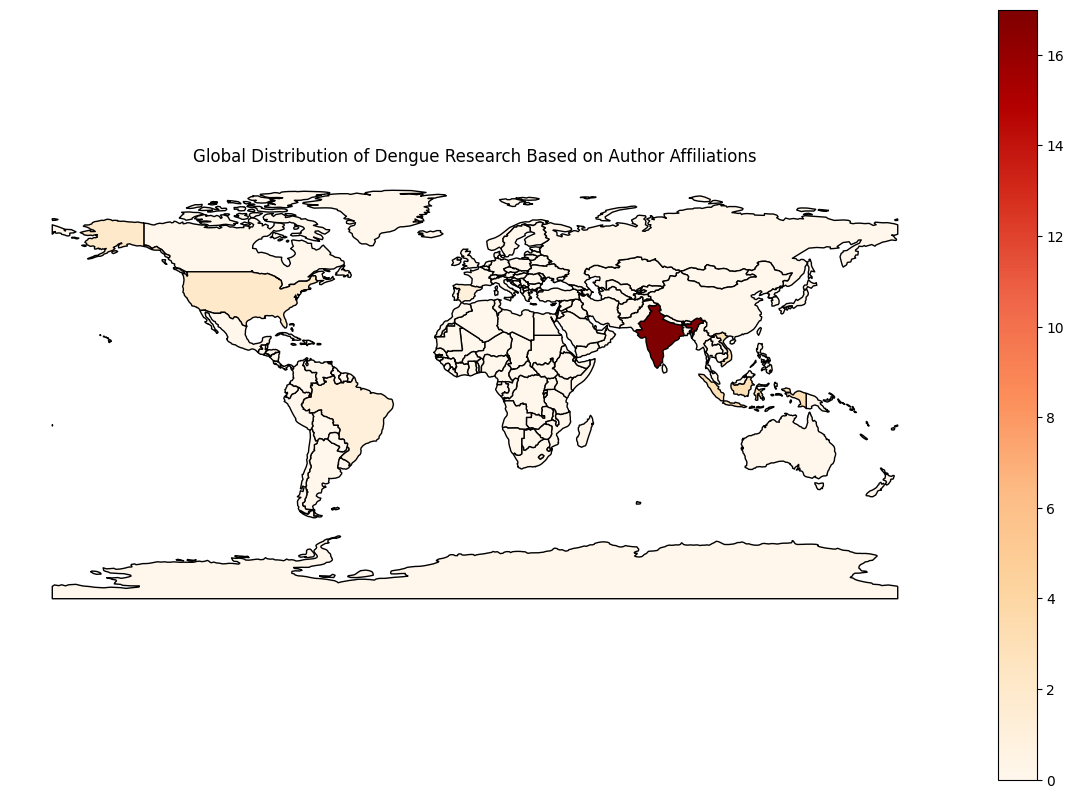

In [52]:
import geopandas as gpd

# Loading the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Ensuring the country names in our dataset match the names in the world map data
# This may require manual adjustment for some countries
world['name'] = world['name'].replace({'United States of America': 'USA'})

# Merging our data with the world map data
world = world.merge(country_counts.rename('ResearchCount'), left_on='name', right_index=True, how='left')

# Filling NaN values with 0 to indicate no research activity for unmatched countries
world['ResearchCount'] = world['ResearchCount'].fillna(0)

# Creating the chloropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='ResearchCount', ax=ax, legend=True, cmap='OrRd', edgecolor='black')
ax.set_title('Global Distribution of Dengue Research Based on Author Affiliations')
ax.set_axis_off()
plt.show()



<ipython-input-53-84be1848d031>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


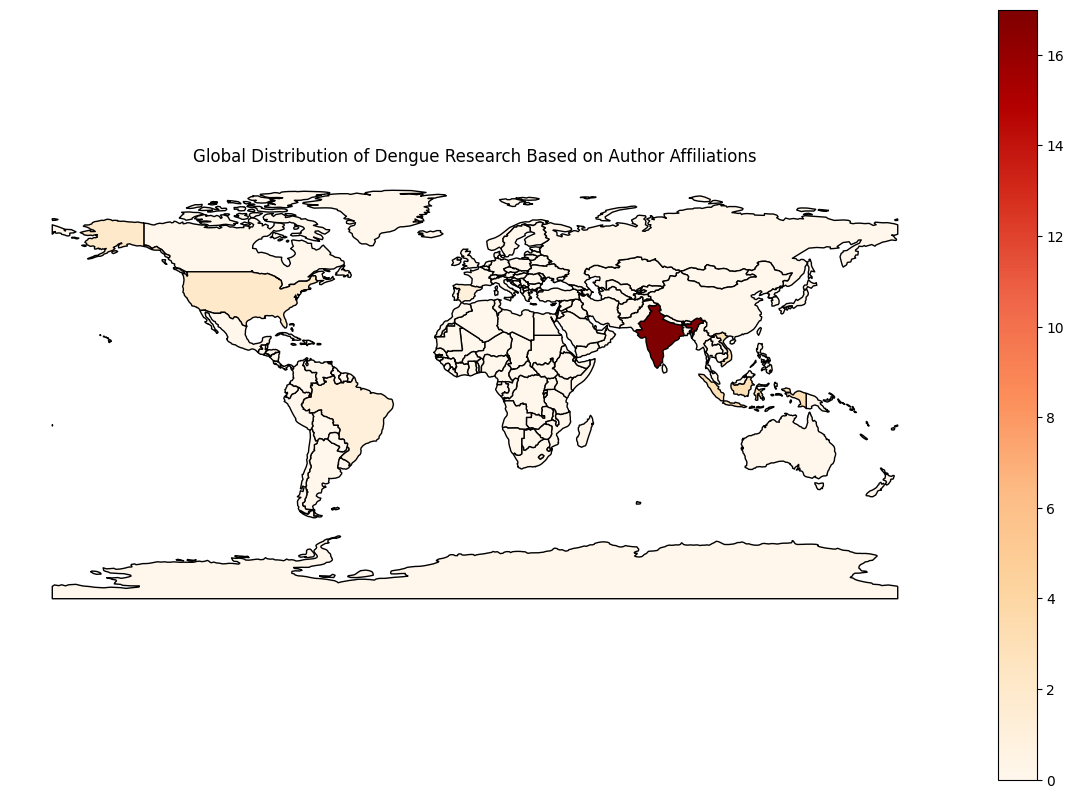

In [53]:
import geopandas as gpd

# Loading the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Ensuring the country names in our dataset match the names in the world map data
# This may require manual adjustment for some countries
world['name'] = world['name'].replace({'United States of America': 'USA'})

# Merging our data with the world map data
world = world.merge(country_counts.rename('ResearchCount'), left_on='name', right_index=True, how='left')

# Filling NaN values with 0 to indicate no research activity for unmatched countries
world['ResearchCount'] = world['ResearchCount'].fillna(0)

# Creating the chloropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='ResearchCount', ax=ax, legend=True, cmap='OrRd', edgecolor='black')
ax.set_title('Global Distribution of Dengue Research Based on Author Affiliations')
ax.set_axis_off()
plt.show()



In [58]:
# Identifying the researchers who have been active for the longest amount of time

# Merging the authors dataset with the articles dataset to get the year of publication for each author
merged_df = pd.merge(cleaned_authors_df,df_articles_clean[['PMID', 'Year']], on='PMID')

# Grouping by author full name and finding the earliest and latest year of publication
author_years = merged_df.groupby('AuthorFullName')['Year'].agg(['min', 'max'])

# Calculating the duration of activity for each author
author_years['Duration'] = author_years['max'] - author_years['min']


# Sorting authors by the duration of their activity
longest_active_authors = author_years.sort_values(by='Duration', ascending=False).head(30)





# Formatting the duration in a more readable format (years, months)

def format_duration(years):
    """Formats the duration in years and months."""
    years_part = years // 1  # Integer part for years
    months_part = int((years % 1) * 12)  # Fractional part converted to months
    return "{} years, {} months".format(years_part, months_part)

# Applying the formatting function to the duration
longest_active_authors['year, month'] = longest_active_authors['Duration'].apply(format_duration)

longest_active_authors[['min', 'max', 'year, month']]



,min,max,"year, month"
AuthorFullName,,,
Y C Chan,1965,1995,"30 years, 0 months"
Yee-Shin Lin,2000,2023,"23 years, 0 months"
A Cabié,2000,2023,"23 years, 0 months"
Trai-Ming Yeh,2000,2023,"23 years, 0 months"
Hsiao-Sheng Liu,2000,2021,"21 years, 0 months"
Duane J Gubler,2002,2023,"21 years, 0 months"
Pa-Thai Yenchitsomanus,2002,2023,"21 years, 0 months"
Terapong Tantawichien,2002,2023,"21 years, 0 months"
Tomohiko Takasaki,2002,2023,"21 years, 0 months"


In [59]:
import plotly.express as px
import pandas as pd

# Counting the number of publications in each journal for all authors (using 'Journal' column)
top_journals_overall = df_articles_clean['Journal'].value_counts().head(10)

# Creating a pie chart using Plotly
fig = px.pie(top_journals_overall, names=top_journals_overall.index, values=top_journals_overall.values,
             title='Distribution of Publications Among Top Journals in Dengue Research (Overall)',
             labels={'names': 'Journal Title', 'values': 'Number of Publications'})
fig.show()


In [60]:
import plotly.express as px
import pandas as pd

# Counting the number of publications in journals that are NOT in the top 10 journals
other_journals = df_articles_clean[~df_articles_clean['Journal'].isin(top_journals_overall.index)]
other_journals_counts = other_journals['Journal'].value_counts()

# Selecting the top 10 journals from the 'other journals' category
top_other_journals = other_journals_counts.head(10)

# Creating a pie chart using Plotly
fig = px.pie(top_other_journals, names=top_other_journals.index, values=top_other_journals.values,
             title='Distribution of Publications Among Journals (Excluding Top 10) in Dengue Research',
             labels={'names': 'Journal Title', 'values': 'Number of Publications'})
fig.show()


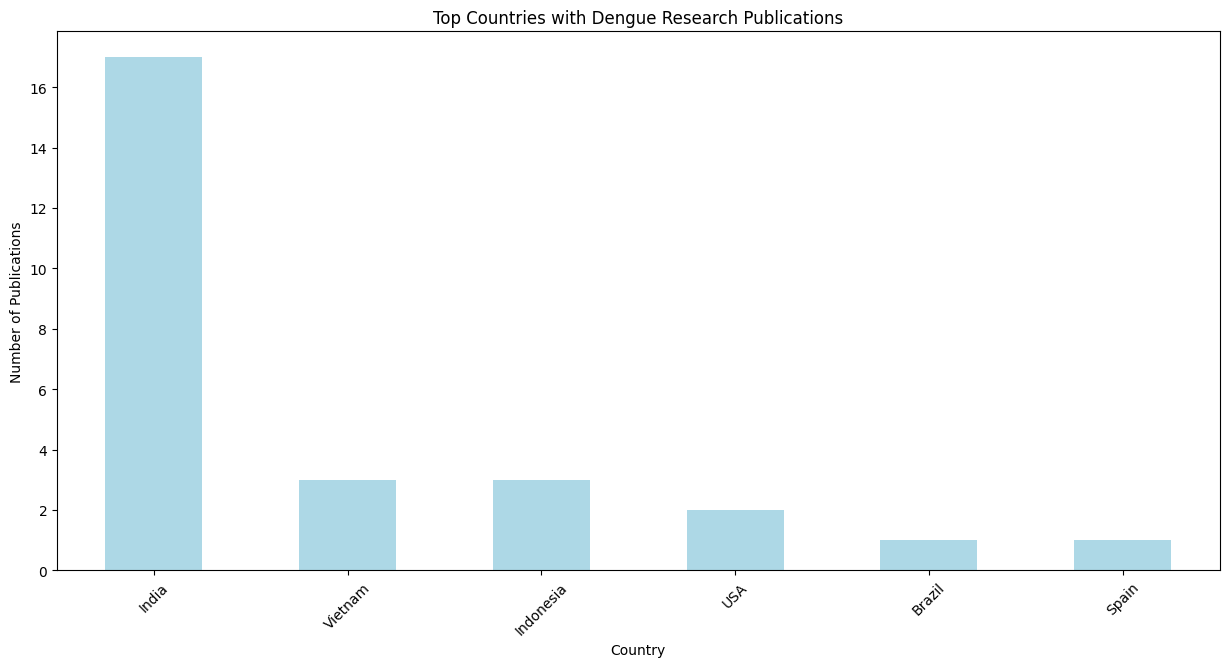

In [63]:
# Additional visualization: Top Countries with Dengue Research Publications

# Counting the number of publications originating from each country (based on author affiliations)
country_publications = cleaned_authors_df['Country'].value_counts().head(10)

# Creating a bar plot for the top countries with Dengue research publications
plt.figure(figsize=(15, 7))
country_publications.plot(kind='bar', color='lightblue')
plt.title('Top Countries with Dengue Research Publications')
plt.xlabel('Country')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.show()



In [ ]:
# Additional visualization: Publication Trend by Top Authors Over Time

# Filtering articles authored by the top 30 longest-active researchers
top_30_author_articles = cleaned_articles_df[cleaned_articles_df['AuthorFullName'].isin(top_30_duration.index)]

# Counting the number of publications per year for the top authors
publications_by_year_top_authors = top_30_author_articles['Year'].value_counts().sort_index()

# Creating a new DataFrame to store publication trend data
publication_trend_df = pd.DataFrame({
    'Year': publications_by_year_top_authors.index,
    'Publications': publications_by_year_top_authors.values
})

# Creating a line plot for the publication trend by top authors over time
plt.figure(figsize=(12, 6))
plt.plot(publication_trend_df['Year'], publication_trend_df['Publications'], marker='o', color='orange')
plt.title('Publication Trend by Top 30 Longest-Active Researchers in Dengue Research Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.grid(True)
plt.show()

